In [ ]:
Task 1

In [1]:
import numpy as np
a = np.floor(10 * np.random.rand(10,3) - 5)
print(np.array([a[lines][np.argsort(np.abs(a[lines] - 0.5))[0]] for lines in range(10)]))

[ 1.  0.  1. -1.  0.  1.  2. -2.  1. -1.]


In [ ]:
Task 2

In [2]:
import numpy as np
a = np.random.rand(6,6)
print(a)
print(a.sum(axis = 1)/a.min(axis = 0))

[[0.72505091 0.00222664 0.99353328 0.70582012 0.05444328 0.45201369]
 [0.65506248 0.76067155 0.42633584 0.61504333 0.48374592 0.19706886]
 [0.43918431 0.00849072 0.39103921 0.19132607 0.134135   0.90041629]
 [0.07194336 0.32479035 0.48944847 0.36665952 0.9352372  0.87096112]
 [0.86482789 0.31253479 0.63801601 0.71527948 0.99151201 0.07413074]
 [0.9203718  0.17315934 0.51622509 0.51232001 0.57052983 0.0789696 ]]
[  40.76940612 1409.2672155     5.27975597   15.98862062   66.05592368
   37.38767217]


In [ ]:
Task 3

In [3]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
m = x == 0 
print(max(x[1:]*m[:-1]))

5


In [ ]:
Task 4

In [4]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, None, len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [ ]:
Task 5

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(obs, number_of_clusters, iter_max=20, dif_dis=1e-05):
    dis = 1
    iter=0
    new_dis = 0
    old_dis = 0

    data = obs[:,0] + obs[:,1]*1j

    centroids = np.array([[data[-5*i] for i in range(0,number_of_clusters)]]) #initial centroids
    new_centroids = centroids

    while ((dis > dif_dis) and (iter<iter_max)):  
         iter+=1      
         centroids = new_centroids
         clusters = np.argmin(abs(data - centroids.T), axis = 0)

         new_centroids.fill(0)
         
         for i in range(0,clusters.size):
             new_centroids[0][clusters[i]]+=data[i]

         new_centroids[0] /= np.hstack((np.bincount(clusters), np.ones(number_of_clusters - np.bincount(clusters).size)))

         new_dis = np.sum(abs(data - centroids.T[clusters].ravel()))
         dis = abs(old_dis - new_dis)
         old_dis = new_dis


    result = np.ones((number_of_clusters, 2))
    result[:,0] = new_centroids.real
    result[:,1] = new_centroids.imag
    
    return (result, new_dis/number_of_clusters)

In [ ]:
Task 6

[['0001' 'Male' '19' '15' '39']
 ['0002' 'Male' '21' '15' '81']
 ['0003' 'Female' '20' '16' '6']
 ['0004' 'Female' '23' '16' '77']
 ['0005' 'Female' '31' '17' '40']]


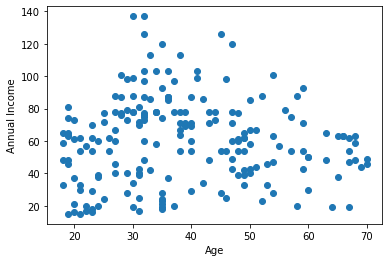

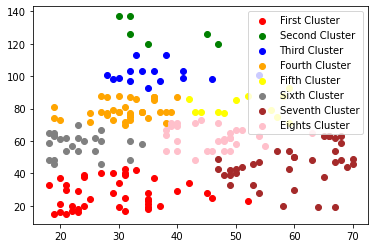

In [6]:
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
print(data[:5])

data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

a = []

dataset = list( kmeans( data[:,2:4], 8 ) )
centroids = np.array( dataset[0] )
for i in range( len ( centroids ) ):
    a.append( [0] )
m = [0] * len( data[:,3] )
for j in range( len( data[:,3] ) ):
    m[j] = np.argmin(np.array( [np.linalg.norm( data[:,2:4][j] - centroids[i] ) for i in range( len( centroids ) ) ] ) )
    a[m[j]].append(data[:,2:4][j])
for i in range( len( centroids ) ):
    a[i].pop(0)
plt.scatter(*np.array(a[0]).T, c='r', label = 'First Cluster')
plt.scatter(*np.array(a[1]).T, c='g', label = 'Second Cluster')
plt.scatter(*np.array(a[2]).T, c='b', label = 'Third Cluster')
plt.scatter(*np.array(a[3]).T, c='orange', label = 'Fourth Cluster')
plt.scatter(*np.array(a[4]).T, c='yellow', label = 'Fifth Cluster')
plt.scatter(*np.array(a[5]).T, c='grey', label = 'Sixth Cluster')
plt.scatter(*np.array(a[6]).T, c='brown', label = 'Seventh Cluster')
plt.scatter(*np.array(a[7]).T, c='pink', label = 'Eights Cluster')
plt.legend()
plt.show()